In [1]:
from IPython.display import Image 
from sklearn.datasets import load_iris 
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns
import pandas as pd
import numpy as np

from sklearn.preprocessing import StandardScaler

# 비지도 학습 (Unsupervised Learning)

비지도 학습(Unsupervised Learning)은 기계 학습의 일종으로, 데이터가 어떻게 구성되었는지를 알아내는 문제의 범주에 속합니다. 
이 방법은 지도 학습(Supervised Learning) 혹은 강화 학습(Reinforcement Learning)과는 달리 **입력값에 대한 목표치가 주어지지 않습니다**.

- 군집화: KMeans Clustering, DBSCAN
- 군집화 평가 (실루엣 스코어)

### K-Means Clustering

`아이리스 데이타 로드`

In [2]:
iris = load_iris()

`로드한 데이타를 DataFrame으로 변환`

In [3]:
df = pd.DataFrame(iris['data'], columns=iris['feature_names'])
df['target'] = iris['target']
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [4]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [5]:
kmeans = KMeans(n_clusters=3)

In [6]:
#fit이 아니라 마치 전처리 함수처럼 fit_transform로 한다.
#x컬럼만 넣었다
data_scaled = StandardScaler().fit_transform(df.loc[:, 'sepal length (cm)': 'petal width (cm)'])
cluster_data = kmeans.fit_transform(data_scaled)



In [7]:
#이것만 봐서는 뭔지 모른다.아래에서 labels를 찍어보자
cluster_data[:5]
# cluster_data

array([[3.98940603, 0.21295824, 3.12119834],
       [4.01793312, 0.99604549, 2.6755083 ],
       [4.19343668, 0.65198444, 2.97416665],
       [4.19784749, 0.9034561 , 2.88014429],
       [4.11157152, 0.40215457, 3.30022609]])

In [8]:
#cluster가 이렇게 분류를 했다.
kmeans.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2])

### 시각화

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


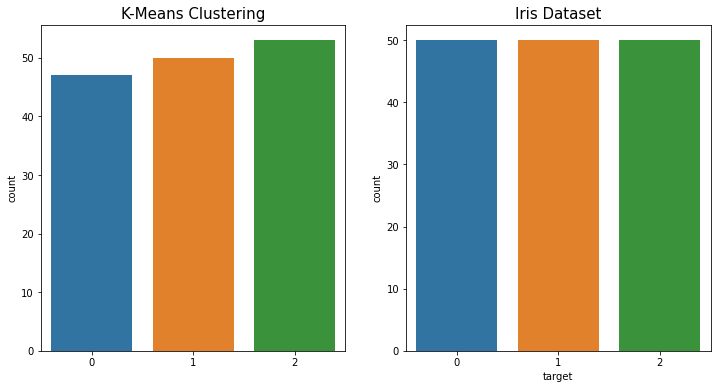

In [9]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(kmeans.labels_)
plt.title('K-Means Clustering', fontsize=15)
plt.subplot(1, 2, 2)
sns.countplot(df['target'])
plt.title('Iris Dataset', fontsize=15)
plt.show()

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


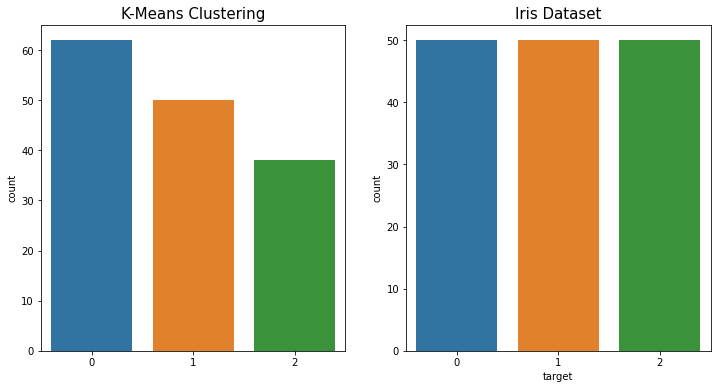

In [10]:
# hyperparameter 변화

kmeans = KMeans(n_clusters=3, max_iter=500)
cluster_data = kmeans.fit_transform(df.loc[:, 'sepal length (cm)': 'petal width (cm)'])

# 시각화
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(kmeans.labels_)
plt.title('K-Means Clustering', fontsize=15)
plt.subplot(1, 2, 2)
sns.countplot(df['target'])
plt.title('Iris Dataset', fontsize=15)
plt.show()

### DBSCAN (Density-based spatial clustering of applications with noise)

k-means는 거리기반 기하학적 모양의 데이터 분류를 하기 어려움.  

밀도 기반 클러스터링

- 밀도가 높은 부분을 클러스터링 하는 방식
- 어느점을 기준으로 **반경 x내에 점이 n개 이상 있으면 하나의 군집으로 인식**하는 방식
- KMeans 에서는 n_cluster의 갯수를 반드시 지정해 주어야 하나, DBSCAN 에서는 필요없음
- 기하학적인 clustering도 잘 찾아냄
- 어느 군집에도 속하지 못한 데이터는 -1

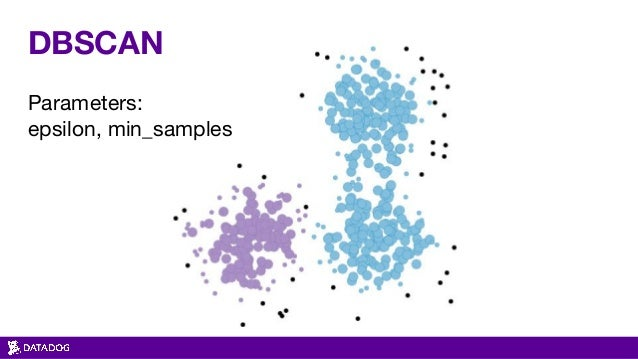

In [12]:
Image('https://image.slidesharecdn.com/pydatanyc2015-151119175854-lva1-app6891/95/pydata-nyc-2015-automatically-detecting-outliers-with-datadog-26-638.jpg')

In [11]:
from sklearn.cluster import DBSCAN

In [16]:
#eps(epsilon) : 반경을 넓게하면 군집의 수가 작아지고 작게하면 군집의 수가 많아짐
#min_samples : 반경 안에 몇개 이상의 데이터가 있을 때 하나의 그룹으로 인정할 지 여부
#dbscan = DBSCAN(eps=0.3, min_samples=2)
dbscan = DBSCAN(eps=0.7, min_samples=2)

dbscan_data = dbscan.fit_predict(df.loc[:, 'sepal length (cm)': 'petal width (cm)'])
dbscan_data

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  2,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1],
      dtype=int64)

In [17]:
df['dbscan'] = dbscan_data
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,dbscan
0,5.1,3.5,1.4,0.2,0,0
1,4.9,3.0,1.4,0.2,0,0
2,4.7,3.2,1.3,0.2,0,0
3,4.6,3.1,1.5,0.2,0,0
4,5.0,3.6,1.4,0.2,0,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,1
146,6.3,2.5,5.0,1.9,2,1
147,6.5,3.0,5.2,2.0,2,1
148,6.2,3.4,5.4,2.3,2,1


## 실루엣 스코어 (군집화 평가)

실루엣 기법은 클러스터링의 품질을 **정량적으로 계산해주는 방법**입니다. 

i번째 데이터 x(i)에 대한 실루엣 계수 s(i) 값은 아래의 식으로 정의됩니다.

s(i) 값이 크려면 데이터끼리는 촘촘하고 그룹간의 거리는 멀어야함.

In [14]:
Image(url='https://mblogthumb-phinf.pstatic.net/MjAxNzA1MzBfMjA0/MDAxNDk2MTI0NDAzMTk0.dPX6Uh3O4h7MMc0BdXOYyJ5C4W9EN6OimkGsUaisXVIg.E-PsOP3a_SBm_HyfupxheTav3ZkXAjg-iDcynQKHAmAg.PNG.samsjang/%25EC%25BA%25A1%25EC%25B2%25981.PNG?type=w800')

- a(i)는 클러스터내 **데이터 응집도(cohesion)를 나타내는 값**. 이 거리가 작으면 응집도가 높습니다.

- b(i)는 클러스터간 **분리도(separation)를 나타내는 값**. 이 값이 크다면, 클러스터 간극이 크다는 의미입니다.

만약 클러스터 개수가 최적화 되어 있다면 b(i)의 값은 크고, a(i)의 값은 작아집니다. 따라서 **s(i)의 값은 1에 가까운 숫자**가 됩니다. 

반대로 클러스터내 데이터 응집도와 클러스터간 분리도의 값이 같으면 **실루엣 계수 s(i)는 0**이 됩니다.

클러스터링의 품질을 정량적으로 평가해 주는 지표

- 1: 클러스터링의 품질이 좋다
- 0: 클러스터링의 품질이 안좋다 (클러스터링의 의미 없음)
- 음수: 잘못 분류됨

In [18]:
from sklearn.metrics import silhouette_score, silhouette_samples

In [19]:
#매개변수는 실제 데이터와 클러스터링한 그룹 label
score = silhouette_score(data_scaled, kmeans.labels_)
score

0.44366157397640527

In [20]:
samples = silhouette_samples(data_scaled, kmeans.labels_)
samples[:5]

array([0.73318987, 0.57783809, 0.68201014, 0.62802187, 0.72693222])

In [21]:
def plot_silhouette(X, num_cluesters):
    for n_clusters in num_cluesters:
        # Create a subplot with 1 row and 2 columns
        fig, (ax1, ax2) = plt.subplots(1, 2)
        fig.set_size_inches(18, 7)

        # The 1st subplot is the silhouette plot
        # The silhouette coefficient can range from -1, 1 but in this example all
        # lie within [-0.1, 1]
        ax1.set_xlim([-0.1, 1])
        # The (n_clusters+1)*10 is for inserting blank space between silhouette
        # plots of individual clusters, to demarcate them clearly.
        ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    
        # Initialize the clusterer with n_clusters value and a random generator
        # seed of 10 for reproducibility.
        clusterer = KMeans(n_clusters=n_clusters, random_state=10)
        cluster_labels = clusterer.fit_predict(X)
    
        # The silhouette_score gives the average value for all the samples.
        # This gives a perspective into the density and separation of the formed
        # clusters
        silhouette_avg = silhouette_score(X, cluster_labels)
        print("For n_clusters =", n_clusters,
              "The average silhouette_score is :", silhouette_avg)
    
        # Compute the silhouette scores for each sample
        sample_silhouette_values = silhouette_samples(X, cluster_labels)
    
        y_lower = 10
        for i in range(n_clusters):
            # Aggregate the silhouette scores for samples belonging to
            # cluster i, and sort them
            ith_cluster_silhouette_values = \
                sample_silhouette_values[cluster_labels == i]
    
            ith_cluster_silhouette_values.sort()
    
            size_cluster_i = ith_cluster_silhouette_values.shape[0]
            y_upper = y_lower + size_cluster_i
    
            color = cm.nipy_spectral(float(i) / n_clusters)
            ax1.fill_betweenx(np.arange(y_lower, y_upper),
                              0, ith_cluster_silhouette_values,
                              facecolor=color, edgecolor=color, alpha=0.7)
    
            # Label the silhouette plots with their cluster numbers at the middle
            ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))
    
            # Compute the new y_lower for next plot
            y_lower = y_upper + 10  # 10 for the 0 samples
    
        ax1.set_title("The silhouette plot for the various clusters.")
        ax1.set_xlabel("The silhouette coefficient values")
        ax1.set_ylabel("Cluster label")
    
        # The vertical line for average silhouette score of all the values
        ax1.axvline(x=silhouette_avg, color="red", linestyle="--")
    
        ax1.set_yticks([])  # Clear the yaxis labels / ticks
        ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
    
        # 2nd Plot showing the actual clusters formed
        colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
        ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                    c=colors, edgecolor='k')
    
        # Labeling the clusters
        centers = clusterer.cluster_centers_
        # Draw white circles at cluster centers
        ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                    c="white", alpha=1, s=200, edgecolor='k')
    
        for i, c in enumerate(centers):
            ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                        s=50, edgecolor='k')
    
        ax2.set_title("The visualization of the clustered data.")
        ax2.set_xlabel("Feature space for the 1st feature")
        ax2.set_ylabel("Feature space for the 2nd feature")
    
        plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                      "with n_clusters = %d" % n_clusters),
                     fontsize=14, fontweight='bold')
    
        plt.show()

- 빨간 점선은 **평균 실루엣 스코어**를 의미합니다.

For n_clusters = 2 The average silhouette_score is : 0.5817500491982808


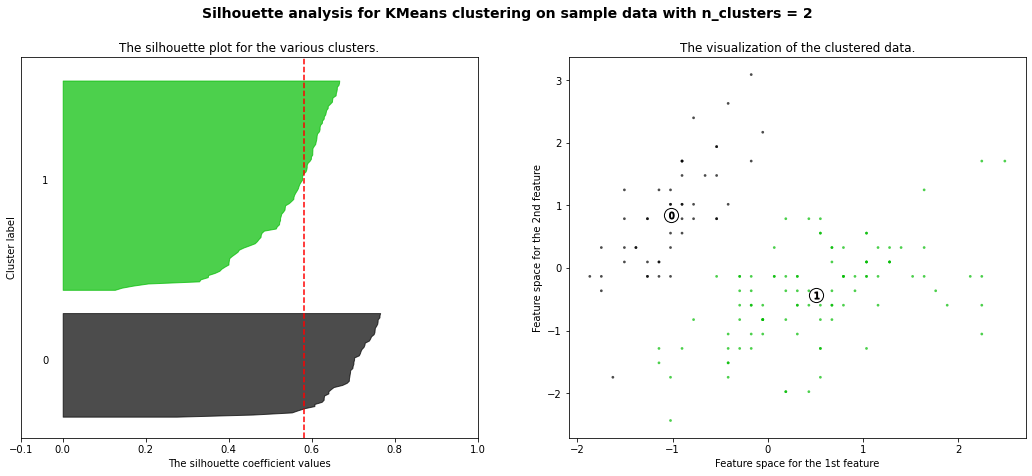

For n_clusters = 3 The average silhouette_score is : 0.45994823920518635


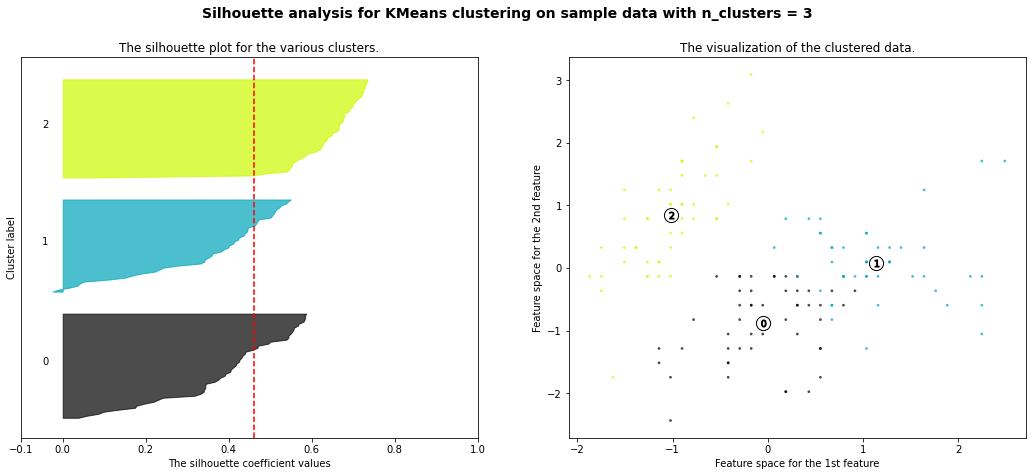

For n_clusters = 4 The average silhouette_score is : 0.383850922475103


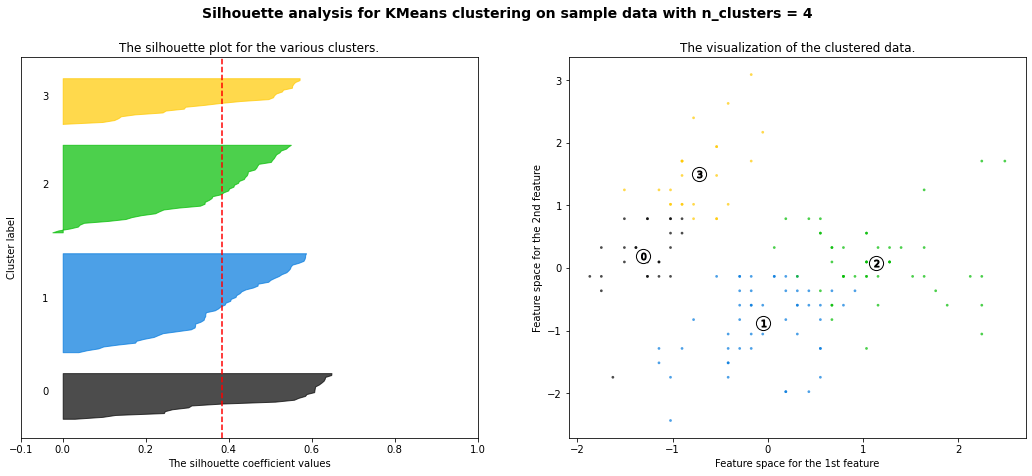

For n_clusters = 5 The average silhouette_score is : 0.34273996820787694


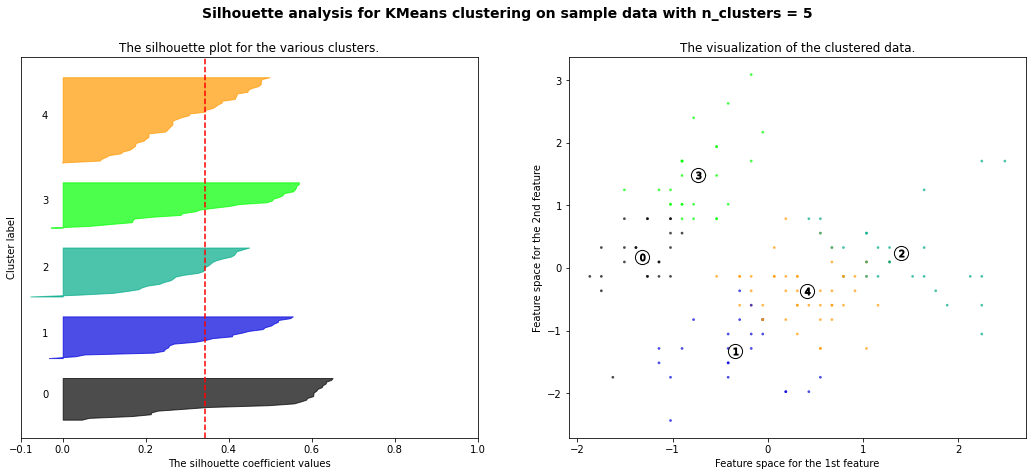

In [23]:
plot_silhouette(data_scaled, [2, 3, 4, 5])